# Random Temporal Networks v1.0 #

In [2]:
import sys
sys.path.append("/home/luffy/Bureau/Random/Library")
import RandTempNet as rn
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Link shuffling ##
We here present randomization techniques based which shuffle links in the static network. All functions take a `link_timeline()` object as input, and return a `link_timeline()` object.

### Link permutation $\text{P}[p_\mathcal{L}(\Theta)]$: `P__pTheta(lks_data)` ###
This function randomly permutates links of a `link_timeline()` object `lks_data`.

In [2]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_lks = rn.P__pTheta(lks_data)

Test of the mean degree preservation:

In [3]:
deg0 = rn.degrees(lks_data.links())
deg1 = rn.degrees(new_lks.links())
sum(deg0.values()) == sum(deg1.values())

True

Test of the link permutation:

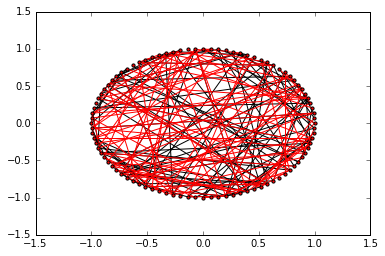

In [4]:
#plot of the aggregated network before and after the permutation
old_links = lks_data.links_display()
new_links = new_lks.links_display()
nodes = list(set().union(*old_links))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(old_links[:100])
pos = nx.circular_layout(G)
nx.draw_networkx(G,pos=pos,with_labels=False,node_size=10)
nx.draw_networkx_edges(G,pos=pos,edgelist=new_links[:100],edge_color='red')
plt.show()

### Link permutation with degree preservation $\text{P}[p_\mathcal{L}(\Theta),\mathbf{k}]$: `P__pTheta_k(lks_data)` ###
This function randomly permutates links of a `link_timeline()` object `lks_data`, while preserving the degrees of the nodes.

In [5]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_lks = rn.P__pTheta_k(lks_data)

Test of the degree preservation:

In [6]:
deg0 = rn.degrees(lks_data.links())
deg1 = rn.degrees(new_lks.links())
Test = np.array([deg0[n] == deg1[n] for n in deg0])
Test.all()

True

Test of the link permutation:

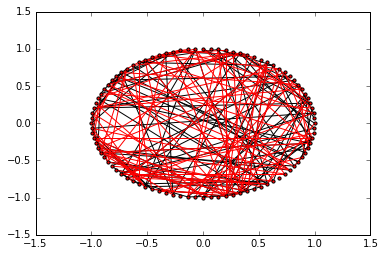

In [7]:
#plot of the aggregated network before and after the permutation
old_links = lks_data.links_display()
new_links = new_lks.links_display()
nodes = list(set().union(*old_links))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(old_links[:100])
pos = nx.circular_layout(G)
nx.draw_networkx(G,pos=pos,with_labels=False,node_size=10)
nx.draw_networkx_edges(G,pos=pos,edgelist=new_links[:100],edge_color='red')
plt.show()

### Timeline permutation $\text{P}[\mathcal{L},p_\mathcal{L}(\Theta)]$: `P__L_pTheta(lks_data)` ###
This function randomly permutates the timelines of a `link_timeline()` object `lks_data`.

In [8]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_lks = rn.P__L_pTheta(lks_data)

In [9]:
lk = lks_data.links()[0]
old_tl = [c.display() for c in lks_data.data[lk]]
new_tl = [c.display() for c in new_lks.data[lk]]
print old_tl[:10]
print new_tl[:10]

[(36172, 1), (37424, 2), (37429, 3), (31997, 1), (31987, 3), (37354, 1), (37427, 1), (42129, 1), (31992, 2)]
[(41365, 1)]


### Timeline permutation with weight preservation $\text{P}[\mathbf{w},p_\mathcal{L}(\Theta)]$: `P__w_pTheta(lks_data)` ###
This function randomly permutates the timelines of a `link_timeline()` object `lks_data`, but preserves their weights.

In [10]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_lks = rn.P__w_pTheta(lks_data)

Test of the preservation of contact frequencies:

In [11]:
w0 = rn.weights(lks_data)
w1 = rn.weights(new_lks)
Test = np.array([w0[l] == w1[l] for l in w0])
Test.all()

True

In [12]:
lk = lks_data.links()[0]
old_tl = [c.display() for c in lks_data.data[lk]]
new_tl = [c.display() for c in new_lks.data[lk]]
print old_tl[:10]
print new_tl[:10]

[(36172, 1), (37424, 2), (37429, 3), (31997, 1), (31987, 3), (37354, 1), (37427, 1), (42129, 1), (31992, 2)]
[(41950, 1), (41947, 1), (41940, 3), (49543, 1), (41953, 1), (41932, 4), (41945, 1), (11931, 3)]


### Timeline permutation with contact frequency preservation $\text{P}[\mathbf{n},p_\mathcal{L}(\Theta)]$: `P__n_pTheta(lks_data)` ###
This function randomly permutates the timelines of a `link_timeline()` object `lks_data`, but preserves their contact frequencies.

In [13]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_lks = rn.P__n_pTheta(lks_data)

Test of the preservation of contact frequencies:

In [14]:
cont0 = rn.number_of_contacts(lks_data)
cont1 = rn.number_of_contacts(new_lks)
Test = np.array([cont0[l] == cont1[l] for l in cont0])
Test.all()

True

In [15]:
lk = lks_data.links()[0]
old_tl = [c.display() for c in lks_data.data[lk]]
new_tl = [c.display() for c in new_lks.data[lk]]
print old_tl[:10]
print new_tl[:10]

[(36172, 1), (37424, 2), (37429, 3), (31997, 1), (31987, 3), (37354, 1), (37427, 1), (42129, 1), (31992, 2)]
[(6686, 1), (6714, 1), (6676, 1), (6708, 1), (6717, 1), (6670, 1), (6712, 1), (6678, 1), (6698, 2)]


### Link permutation with groups preservation: `P__LCM(lks_data,group)` ###
This function randomly permutates links of a `link_timeline()` object `lks_data`, but conserves the group structure defined as the contact matrix in link density between the different groups of nodes. The information about the group affiliations is given via the `group` dictionary, which associates to each node the label of its group.

In [16]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
metadata = np.loadtxt("Bureau/Random/Library/metadata_InVS13.dat",dtype='string')
groups = {int(l[0]):l[1] for l in metadata}
new_lks = rn.P__LCM(lks_data,groups)

Test of the contact matrix preservation:

In [17]:
CM0,labels = rn.LCM(lks_data.links(),groups)
CM1,labels = rn.LCM(new_lks.links(),groups)
Test = np.array_equal(CM0,CM1)
Test

True

Test of the link permutation:

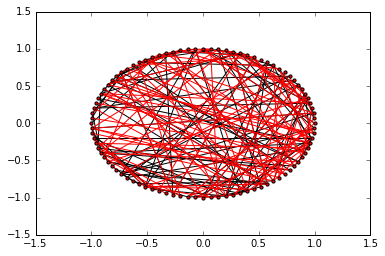

In [18]:
#plot of the aggregated network before and after the permutation
old_links = lks_data.links_display()
new_links = new_lks.links_display()
nodes = list(set().union(*old_links))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(old_links[:100])
pos = nx.circular_layout(G)
nx.draw_networkx(G,pos=pos,with_labels=False,node_size=10)
nx.draw_networkx_edges(G,pos=pos,edgelist=new_links[:100],edge_color='red')
plt.show()

### Link permutation with groups and degree preservation: `P__k_LCM(lks_data,group,n_iter=3)` ###
This function randomly permutates links of a `link_timeline()` object `lks_data`, but conserves the node degrees and the group structure defined as the contact matrix in link density between the different groups of nodes. The information about the group affiliations is given via the `group` dictionary, which associates to each node the label of its group. The function uses the Sneppen-Maslov algorithm to permutate the links. The user can thus define the number of times the function permutates links. This number is given by $n_{\rm iter}\times n_L$, where $n_{\rm iter}$ is the parameter of the function and $n_L$ the number of links in the system. The value of `n_iter` is set to 3 by default. This function returns a `link_timeline()` object and a table of the evolution of the Jaccard similarity index between the original set of links and the new one, so that the user can test the convergence of the method.

In [3]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
metadata = np.loadtxt("Bureau/Random/Library/metadata_InVS13.dat",dtype='string')
groups = {int(l[0]):l[1] for l in metadata}
new_lks,converge = rn.P__k_LCM(lks_data,groups)

Test of the convergence:

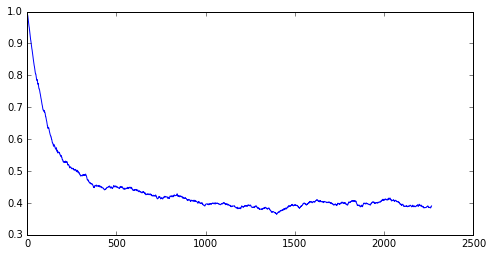

In [4]:
fig = plt.figure(figsize=(8,4))
plt.plot(range(len(converge)),converge,'b-')

Test of the contact matrix preservation:

In [5]:
CM0,labels = rn.LCM(lks_data.links(),groups)
CM1,labels = rn.LCM(new_lks.links(),groups)
Test = np.array_equal(CM0,CM1)
Test

True

Test of the degree preservation:

In [6]:
deg0 = rn.degrees(lks_data.links())
deg1 = rn.degrees(new_lks.links())
Test = np.array([deg0[n] == deg1[n] for n in deg0])
Test.all()

True

In [7]:
print CM0
print CM1

[[ 0.34712644  0.09375     0.05641026  0.05585586  0.09166667]
 [ 0.09375     0.53333333  0.02884615  0.07263514  0.171875  ]
 [ 0.05641026  0.02884615  0.80769231  0.08523909  0.13461538]
 [ 0.05585586  0.07263514  0.08523909  0.31831832  0.10135135]
 [ 0.09166667  0.171875    0.13461538  0.10135135  0.33333333]]
[[ 0.34712644  0.09375     0.05641026  0.05585586  0.09166667]
 [ 0.09375     0.53333333  0.02884615  0.07263514  0.171875  ]
 [ 0.05641026  0.02884615  0.80769231  0.08523909  0.13461538]
 [ 0.05585586  0.07263514  0.08523909  0.31831832  0.10135135]
 [ 0.09166667  0.171875    0.13461538  0.10135135  0.33333333]]
